In [239]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [240]:
df=pd.read_csv("wine.csv")

In [241]:
df.head()

,Id,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity
0,0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.4
1,1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,7.8
2,2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.8
3,3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.2
4,4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.4


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1143 non-null   int64  
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  fixed acidity         1143 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [243]:
df.drop('Id',axis=1,inplace=True)

In [244]:
df.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,8.311111
std,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,1.747595
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,4.600000
25%,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,7.100000
50%,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,7.900000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,9.100000
max,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,15.900000


In [245]:
df.isnull().sum()

volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
fixed acidity           0
dtype: int64

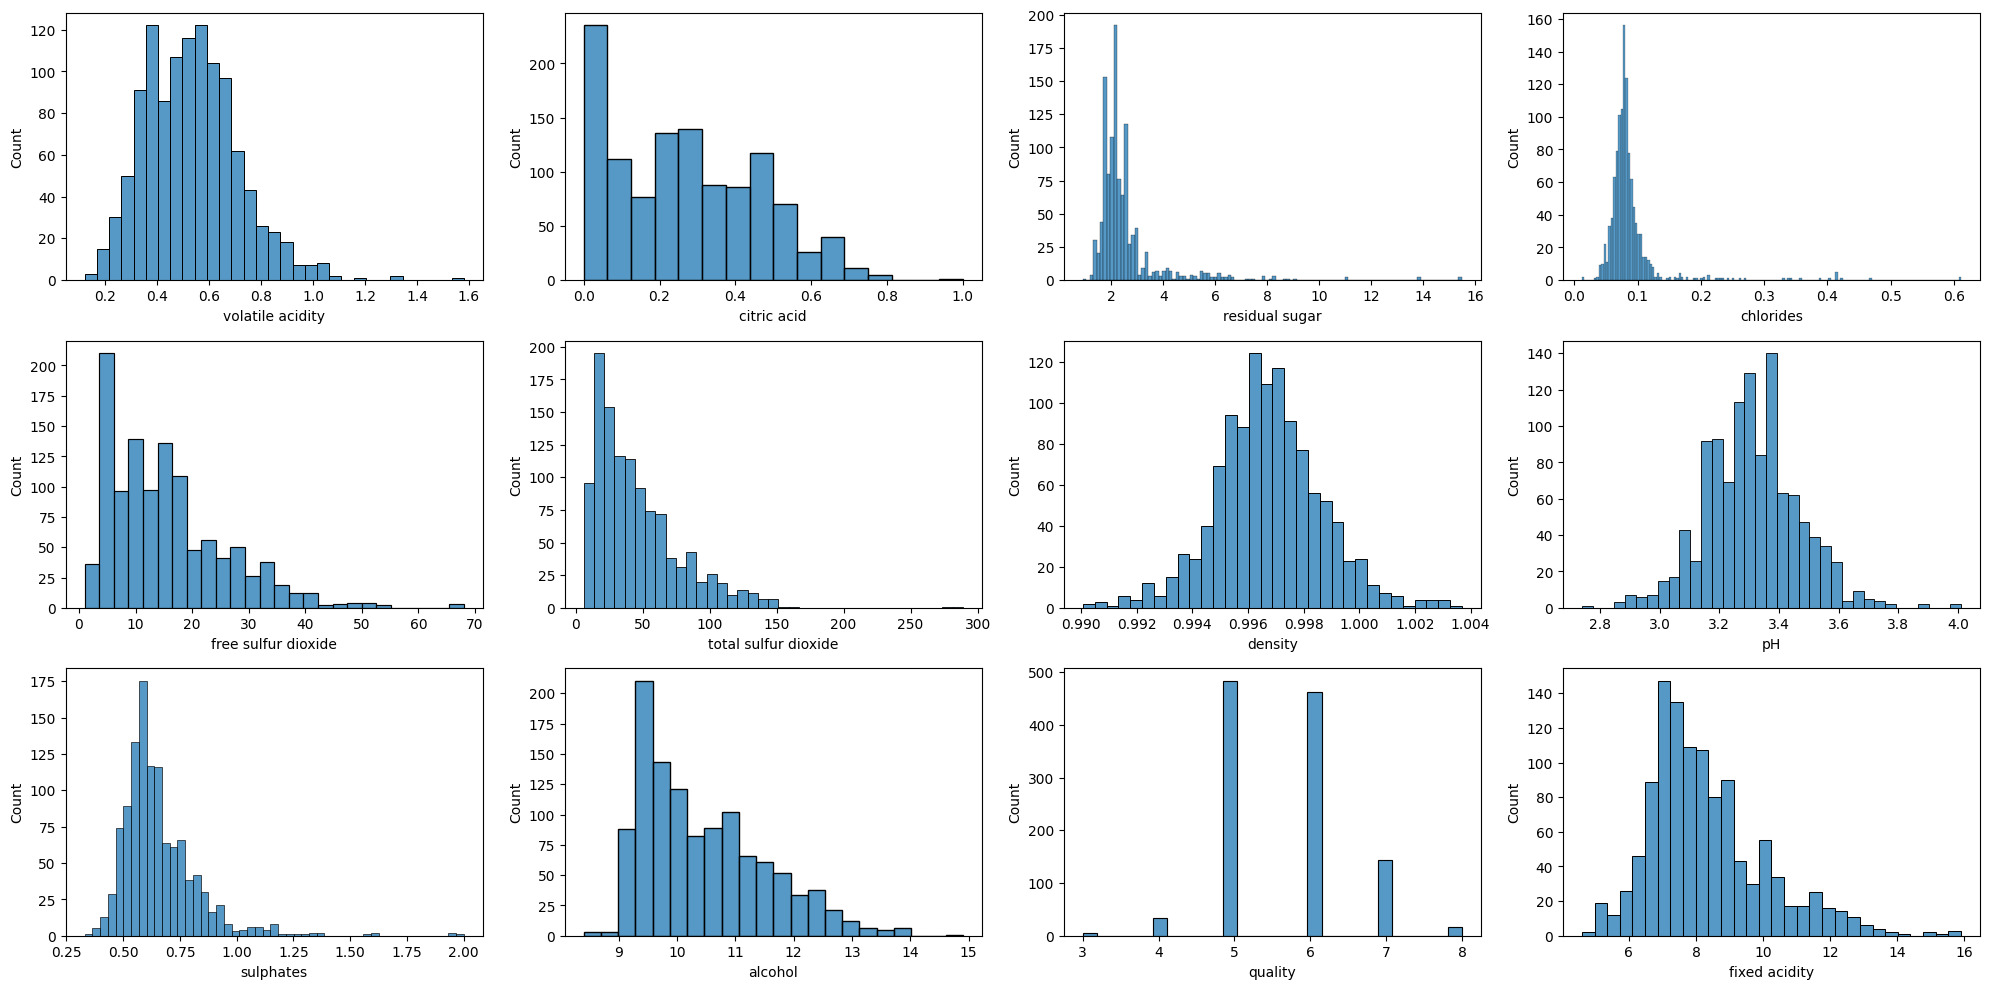

In [246]:
col=('volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','fixed acidity')
fig,axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axs = axs.flatten()
for i, column in enumerate (col):
  sns.histplot(x=column, data=df, ax=axs[i])
fig.tight_layout()
plt.show()


<Axes: xlabel='pH', ylabel='quality'>

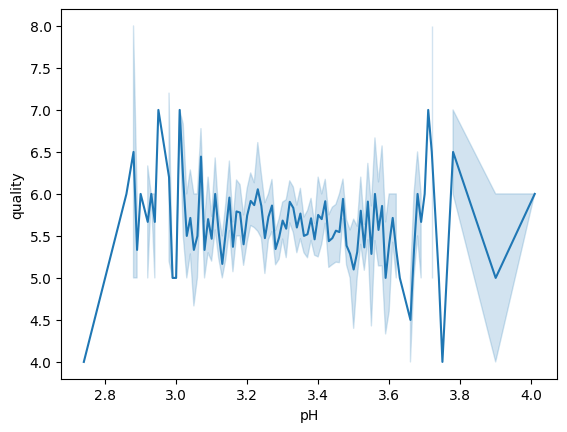

In [247]:
sns.lineplot(data=df, x="pH", y="quality")


<Axes: xlabel='quality', ylabel='count'>

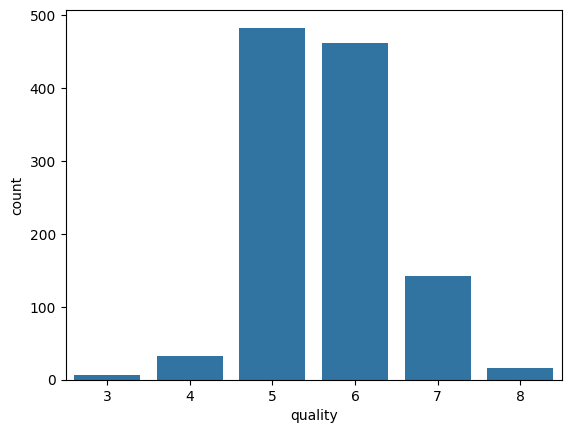

In [248]:
sns.countplot(data=df, x='quality')

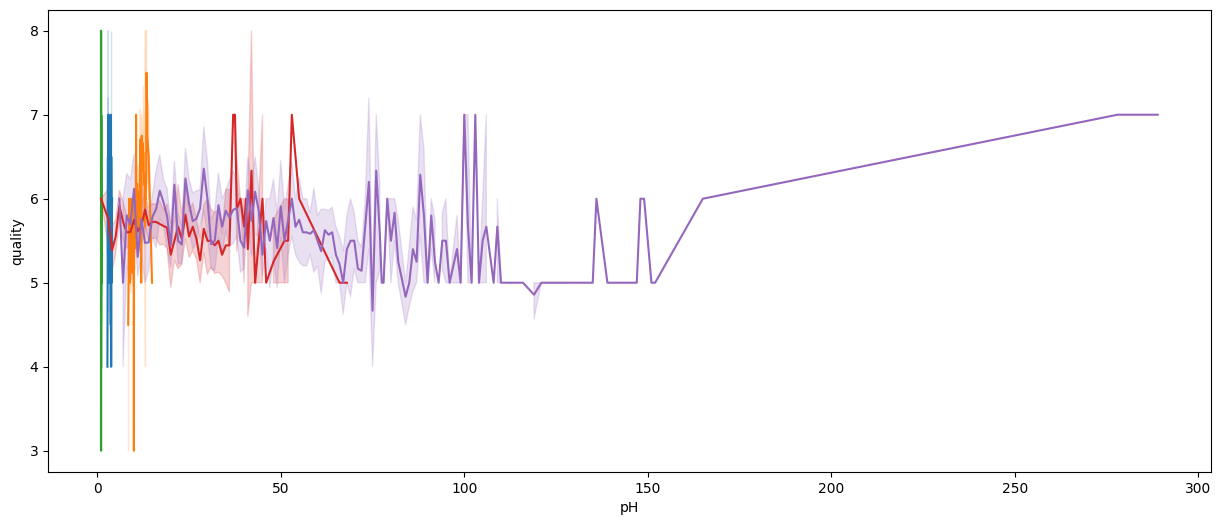

In [249]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x="pH", y="quality")
sns.lineplot(data=df, x="alcohol", y="quality")
sns.lineplot(data=df, x="density", y="quality")
sns.lineplot(data=df, x="free sulfur dioxide", y="quality")
sns.lineplot(data=df, x="total sulfur dioxide", y="quality")
plt.show()


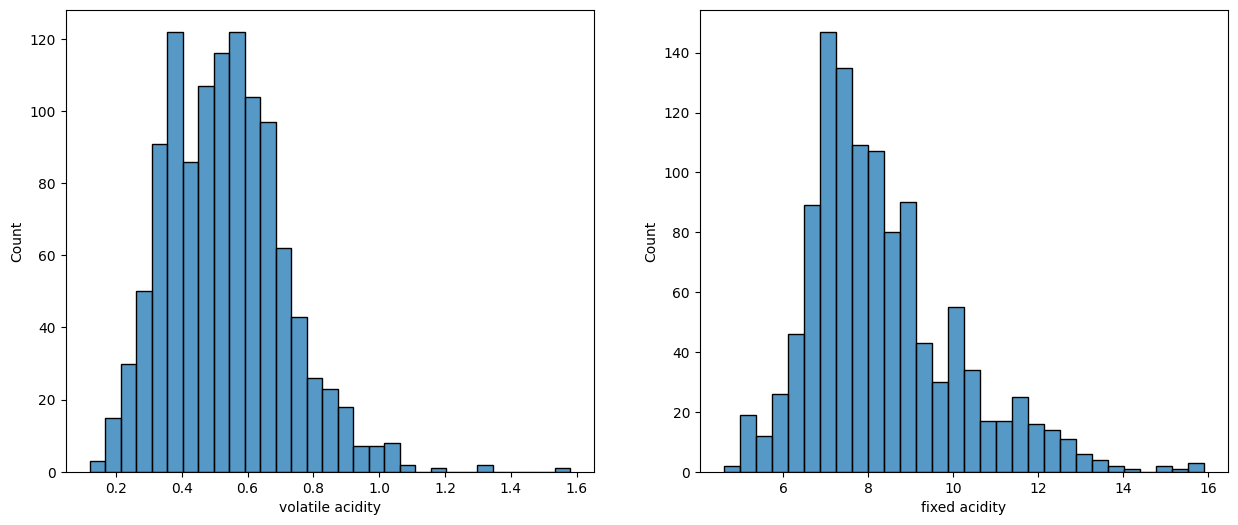

In [250]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(data=df, x="volatile acidity", ax=axs[0])
sns.histplot(data=df, x="fixed acidity", ax=axs[1])
plt.show()


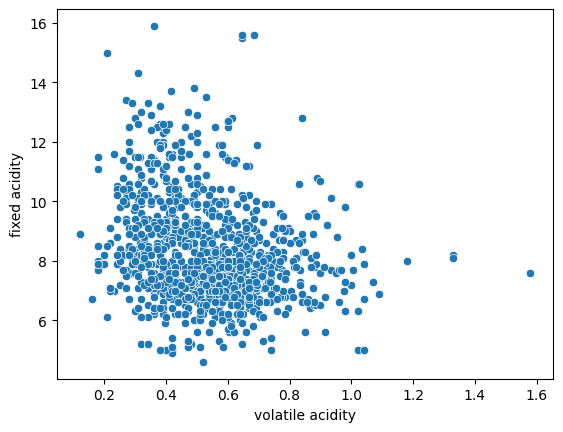

In [251]:
sns.scatterplot(x="volatile acidity", y="fixed acidity", data=df)
plt.show()


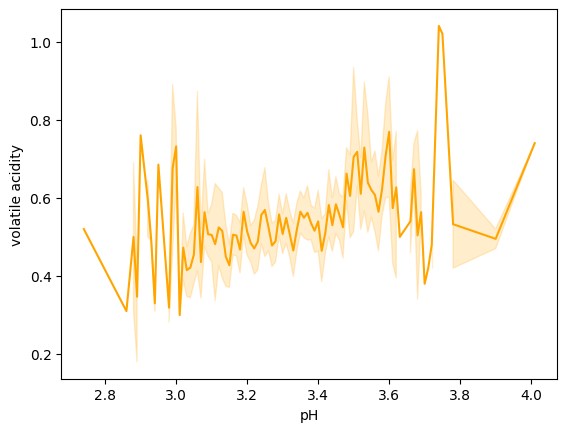

In [252]:
sns.lineplot(x="pH", y="volatile acidity", data=df, color="orange")
plt.show()


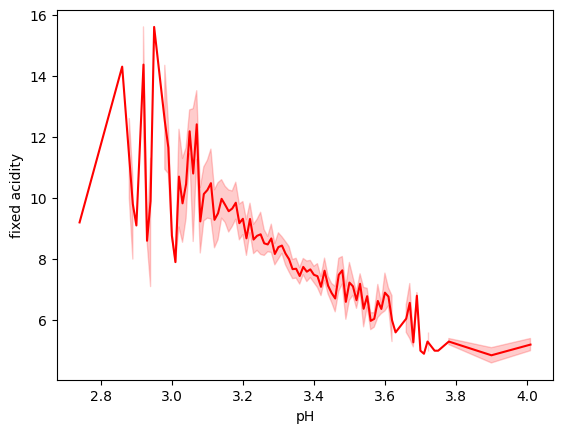

In [253]:
sns.lineplot(x="pH", y="fixed acidity", data=df, color="Red")
plt.show()


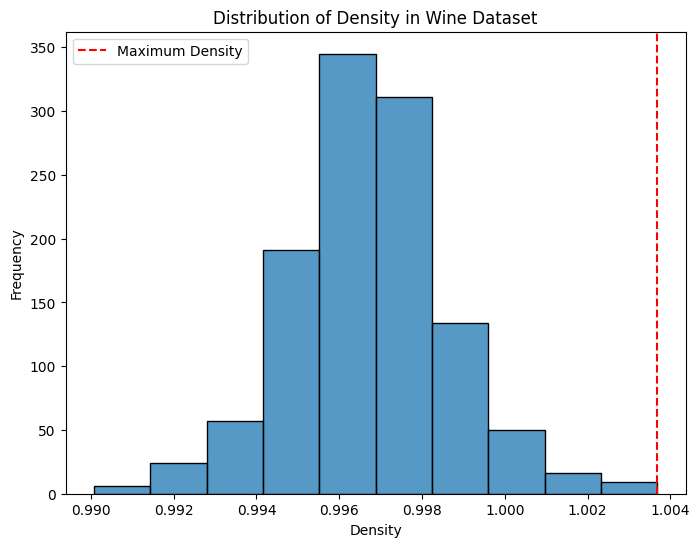

In [254]:
max_density = df['density'].max()
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="density", bins=10)
plt.xlabel("Density")
plt.ylabel("Frequency")
plt.title("Distribution of Density in Wine Dataset")
plt.axvline(x=max_density, color="red", linestyle="--", label="Maximum Density")
plt.legend()
plt.show()


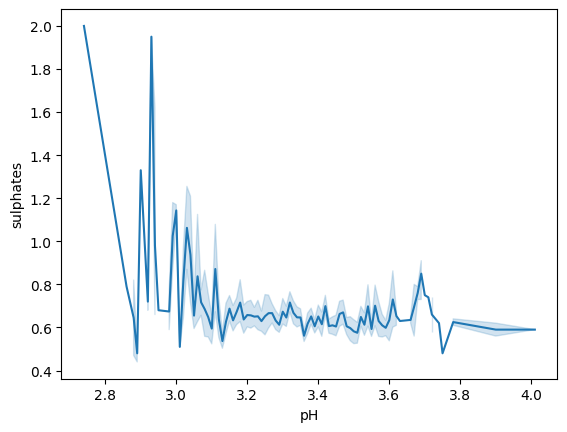

In [255]:
sns.lineplot(x="pH", y="sulphates", data=df)
plt.show()


In [256]:
df['xquality'] = [1 if x >=6 else 0 for x in df['quality']]

In [257]:
df.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity,xquality
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.4,0
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,7.8,0
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.8,0
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.2,1
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.4,0


In [258]:
X=df[['density','pH','alcohol','fixed acidity']]
print(X)

      density    pH  alcohol  fixed acidity
0     0.99780  3.51      9.4            7.4
1     0.99680  3.20      9.8            7.8
2     0.99700  3.26      9.8            7.8
3     0.99800  3.16      9.8           11.2
4     0.99780  3.51      9.4            7.4
...       ...   ...      ...            ...
1138  0.99574  3.42     11.0            6.3
1139  0.99651  3.42      9.5            6.8
1140  0.99490  3.45     10.5            6.2
1141  0.99512  3.52     11.2            5.9
1142  0.99547  3.57     10.2            5.9

[1143 rows x 4 columns]


In [259]:
Y=df['xquality']


In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

In [261]:
model=SVC(probability=True)

In [262]:
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.7379912663755459


In [263]:
print("R2 Score: ", r2_score (Y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(Y_test, y_pred))
print("Mean Absolute Error: ",mean_absolute_error(Y_test, y_pred))


R2 Score:  -0.056923076923076854
Mean Squared Error:  0.26200873362445415
Mean Absolute Error:  0.26200873362445415


In [264]:
probabilities = model.predict_proba(X_test)

logloss = log_loss(Y_test, probabilities)

print("Log Loss:", logloss)


Log Loss: 0.5417642348253532


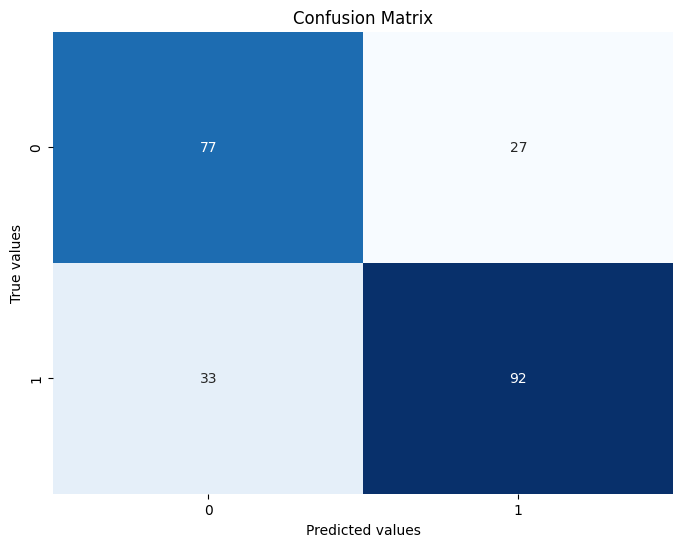

In [265]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()


In [266]:
model_2= RandomForestClassifier()

In [267]:
model_2.fit(X_train,Y_train)
y_pred = model_2.predict(X_test)

print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.7205240174672489


In [268]:
print("R2 Score: ", r2_score (Y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(Y_test, y_pred))
print("Mean Absolute Error: ",mean_absolute_error(Y_test, y_pred))


R2 Score:  -0.1273846153846152
Mean Squared Error:  0.2794759825327511
Mean Absolute Error:  0.2794759825327511


In [269]:
probabilities = model_2.predict_proba(X_test)

logloss = log_loss(Y_test, probabilities)

print("Log Loss:", logloss)

Log Loss: 0.5471022740691848


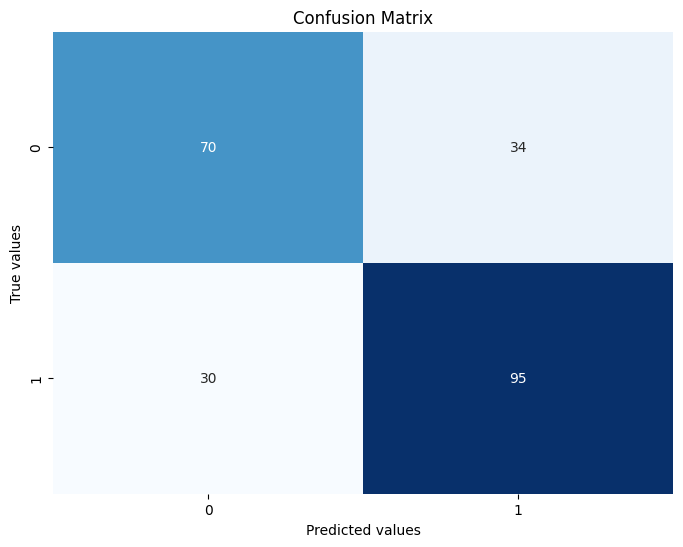

In [270]:
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()